In [4]:
import pandas as pd
import numpy as np

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import r_regression

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier

#preprocessor and reading data in
le = preprocessing.LabelEncoder()
df = pd.read_csv("combined_dataset.csv")

In [5]:
# create data frames
X = (df.drop(["label","category","specific_class"], axis=1))
Y = (df.drop(["ID","DATA_0","DATA_1","DATA_2","DATA_3","DATA_4","DATA_5","DATA_6","DATA_7","label","category"], axis=1))

# convert target column to dummy values
specific_class = le.fit_transform(list(Y["specific_class"]))
Y.drop("specific_class", axis=1, inplace=True)
Y["specific_class"] = specific_class

In [8]:
#split data for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=15, test_size = 0.2)

In [10]:


#SEPERATION
#SEPERATION



In [12]:
#initialising decision tree
dtc = DecisionTreeClassifier()

In [14]:
#calculating time and running model
start = time.time()
dtc.fit(X_train, Y_train)
end = time.time()
length = end-start

In [16]:
#time taken to run
length = str(length)
print("Time: "+length+" seconds")

Time: 0.6311099529266357 seconds


In [18]:
#predict values
y_pred = dtc.predict(X_test)

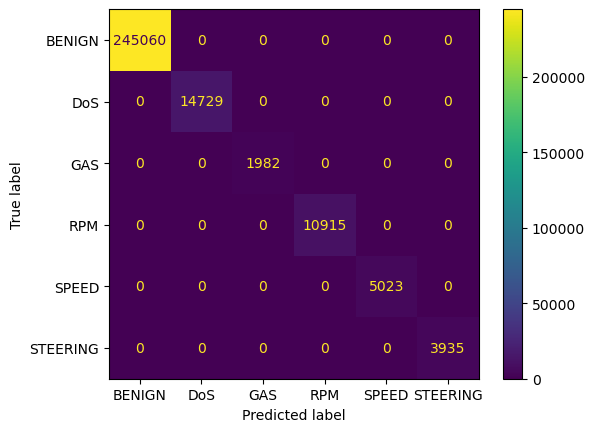

In [21]:
#creation of confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels= dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["BENIGN","DoS","GAS","RPM","SPEED","STEERING"])
disp.plot()
plt.show()

In [23]:
#caculations
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    245060
           1       1.00      1.00      1.00     14729
           2       1.00      1.00      1.00      1982
           3       1.00      1.00      1.00     10915
           4       1.00      1.00      1.00      5023
           5       1.00      1.00      1.00      3935

    accuracy                           1.00    281644
   macro avg       1.00      1.00      1.00    281644
weighted avg       1.00      1.00      1.00    281644



In [25]:


#SEPERATION
#SEPERATION



In [27]:
#initialise GNB
gnb = GaussianNB()

In [29]:
#calculating time and running model
start = time.time()
gnb.fit(X_train, Y_train)
end = time.time()
length = end-start

C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#time taken
length = str(length)
print("Time: "+length+" seconds")

Time: 0.24654293060302734 seconds


In [33]:
#predict values and process data
nb_pred = gnb.predict(X_test)
nb_pred2 = np.round(nb_pred).astype(int)
nb_pred2 = nb_pred2.ravel()

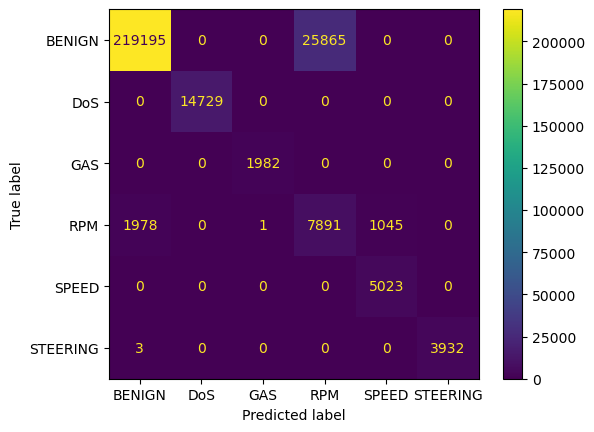

In [35]:
#print confusion matrix
cm2 = confusion_matrix(Y_test, nb_pred2, labels= gnb.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=["BENIGN","DoS","GAS","RPM","SPEED","STEERING"])
disp2.plot(values_format='')
plt.show()

In [37]:
#calculations
print(classification_report(Y_test, nb_pred2))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    245060
           1       1.00      1.00      1.00     14729
           2       1.00      1.00      1.00      1982
           3       0.23      0.72      0.35     10915
           4       0.83      1.00      0.91      5023
           5       1.00      1.00      1.00      3935

    accuracy                           0.90    281644
   macro avg       0.84      0.94      0.87    281644
weighted avg       0.96      0.90      0.92    281644



In [89]:


#SEPERATION
#SEPERATION



In [39]:
#neural network MLP with its chosen parameters
nn = neural_network.MLPClassifier(alpha= 0.1, hidden_layer_sizes= 5, learning_rate= 'adaptive',early_stopping=True)

In [41]:
#calculate time taken and run model
start = time.time()
nn.fit(X_train, Y_train)
stop = time.time()
length = stop-start

C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
#time taken
length = str(length)
print("Time: "+length+" seconds")

Time: 32.54268026351929 seconds


In [43]:
#predict values
nn_pred = nn.predict(X_test)

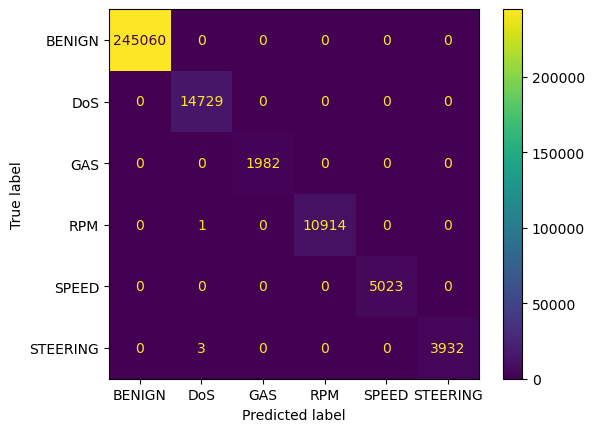

In [44]:
#print confusion matrix
cm3 = confusion_matrix(Y_test, nn_pred, labels= nn.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=["BENIGN","DoS","GAS","RPM","SPEED","STEERING"])
disp3.plot(values_format='')
plt.show()

In [45]:
#calculations
print(classification_report(Y_test, nn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    245060
           1       1.00      1.00      1.00     14729
           2       1.00      1.00      1.00      1982
           3       1.00      1.00      1.00     10915
           4       1.00      1.00      1.00      5023
           5       1.00      1.00      1.00      3935

    accuracy                           1.00    281644
   macro avg       1.00      1.00      1.00    281644
weighted avg       1.00      1.00      1.00    281644



In [103]:


# SEPERATION



In [47]:
#initialise model with parameters
clf = SGDClassifier(loss="hinge", penalty="l2", early_stopping=True)

In [48]:
#calculate time taken and run model
start = time.time()
clf.fit(X_train, Y_train)
end = time.time()
length = end-start

C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#time taken
length = str(length)
print("Time: "+length+" seconds")

Time: 6.815190076828003 seconds


In [50]:
#predict values
clf_pred = clf.predict(X_test)

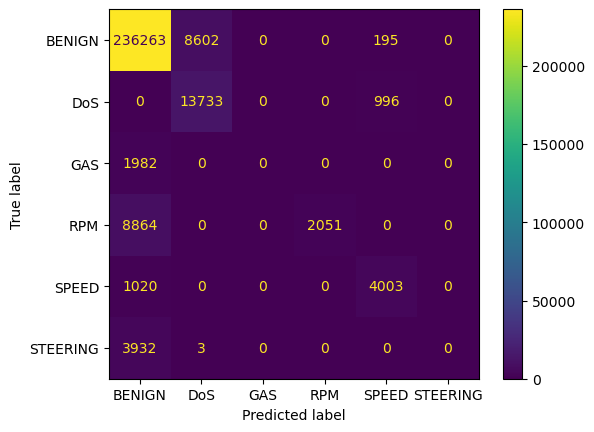

In [51]:
#print confusion matrix
cm4 = confusion_matrix(Y_test, clf_pred, labels= clf.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=["BENIGN","DoS","GAS","RPM","SPEED","STEERING"])
disp4.plot(values_format='')
plt.show()

In [52]:
#calculations
print(classification_report(Y_test, clf_pred))

C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95    245060
           1       0.61      0.93      0.74     14729
           2       0.00      0.00      0.00      1982
           3       1.00      0.19      0.32     10915
           4       0.77      0.80      0.78      5023
           5       0.00      0.00      0.00      3935

    accuracy                           0.91    281644
   macro avg       0.55      0.48      0.47    281644
weighted avg       0.90      0.91      0.89    281644



C:\Users\atifk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
